<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
از دید ناحیه
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از قطعه‌بندی مبتنی بر ناحیه، قطعه‌بندی را انجام دهیم.
</font>
</p>

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
brain.webp
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همچنین در صورتیکه نیاز به اعمال پیش‌پردازش میباشد آنرا نیز در این مرحله انجام دهید.
</p>


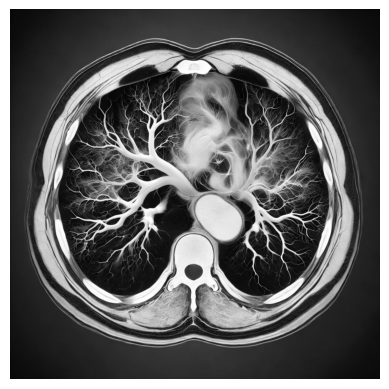

In [31]:
img = cv2.imread("./Data/brain.webp", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, "gray")
plt.axis("off")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: پیاده‌سازی گسترش ناحیه
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای قطعه‌بندی ما از رویکرد گسترش‌ناحیه یا Region Growing استفاده می‌کنیم. شما باید آنرا پیاده‌سازی کنید.
    <br>
    پس از پیاده‌سازی و انجام قطعه‌بندی، باید تصویر قطعه‌بندی شده را ذخیره کنید. توجه کنید که پیش‌زمینه حتما سیاه باشد و پس‌زمینه حتما سفید باشد. تصویر را به نام زیر ذخیره کنید:
    <br>
    region_segment.jpg
</font>
</p>

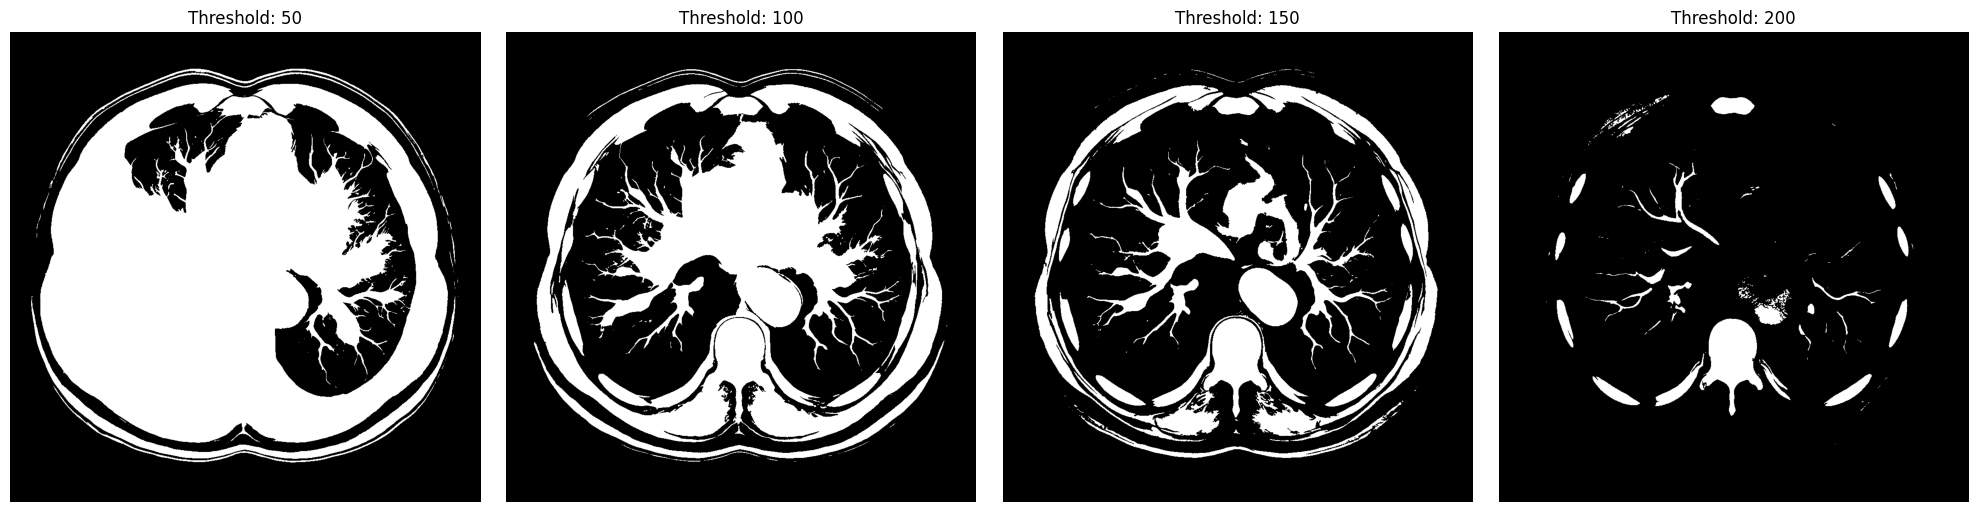

True

In [32]:
def region_growing(img, seed, threshold):
    height, width = img.shape
    visited = np.zeros((height, width), dtype=bool)
    region = np.zeros_like(img, dtype=np.uint8)

    seed_value = img[seed]
    stack = [seed]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue

        visited[x, y] = True
        intensity_diff = abs(int(img[x, y]) - int(seed_value))

        if intensity_diff <= threshold:
            region[x, y] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if (0 <= nx < height) and (0 <= ny < width):
                        if not visited[nx, ny]:
                            stack.append((nx, ny))
    return region


img_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
seed = (100, 100)
thresholds = [50, 100, 150, 200]

results = []
for t in thresholds:
    region = region_growing(img_gaussian, seed, t)
    results.append((t, cv2.bitwise_not(region)))


fig, axs = plt.subplots(1, len(thresholds), figsize=(20, 5))
for i, (t, r) in enumerate(results):
    axs[i].imshow(r, cmap="gray")
    axs[i].set_title(f"Threshold: {t}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()

cv2.imwrite("region_segment.jpg", cv2.cvtColor(results[1][1], cv2.COLOR_GRAY2RGB))

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [33]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "region_segment.jpg"]
compress(file_names)

File Paths:
['notebook.ipynb', 'region_segment.jpg']
